In [28]:
import os 
import dotenv
groq_api_key = dotenv.get_key('.env', 'GROQ_API_KEY')

In [29]:
from langchain_groq import ChatGroq
llm = ChatGroq(groq_api_key =  groq_api_key,model_name = "Llama3-70b-8192")

In [30]:
from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent



In [31]:
from langchain_community.tools import DuckDuckGoSearchRun

def search_duckduckgo(query:str):
    """Searches DuckDuckGo Using Langchain's DuckDuckGoSearchRun Tool"""
    search = DuckDuckGoSearchRun()
    return search.invoke(query)



In [32]:
print(search_duckduckgo("what is the capital of india"))

Delhi is a city and national capital territory in north-central India. The city of Delhi actually consists of two components: Old Delhi, in the north, the historic city; and New Delhi, in the south, since 1947 the capital of India, built in the first part of the 20th century as the capital of British India. India is a diverse and populous country in South Asia with a rich cultural and religious heritage. Its capital is New Delhi, a modern city built in the 20th century. Learn more about India's history, map, population, economy, and festivals. Find out the names, capitals, and languages of India's 28 states and 8 union territories. Learn about the history, culture, and geography of each region with key facts and insights. India, officially the Republic of India, [j] [21] is a country in South Asia. ... Indian royalty, big and small, and the temples they patronised drew citizens in great numbers to the capital cities, which became economic hubs as well. [114] Learn the names and capital

In [33]:
def add(a:float , b:float):
    """Add Two numbers"""
    return a+b

def multiply(a:float , b:float):
    """Multiply two numbers"""
    return a*b

In [34]:
math_agent = create_react_agent(
    model=llm,
    tools = [add,multiply],
    name="math_expert",
    prompt="You are a math expert . Always use one tool at a time ."
)

In [35]:
research_agent = create_react_agent(
    model=llm,
    tools = [search_duckduckgo],
    name="research_agent",
    prompt="You are a world class researcher with access to web search"
)

In [36]:
workflow = create_supervisor(
    model=llm,
    agents = [math_agent,research_agent],
    prompt=("You are a supervisor . You are responsible for the execution of the following workflow .\n\n"
            "for events and information gathering use the research_agent .\n\n"
            "for mathematical operations use the math_agent .\n\n")
)

In [37]:
app = workflow.compile()


In [38]:
results = app.invoke({
    "messages":[
        {
            "role":"user",
            "content":"Who is elon musk?"
        }
    ]
})

In [39]:
for m in results["messages"]:
    m.pretty_print()

================================ Human Message =================================

Who is elon musk?
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_research_agent (call_39p9)
 Call ID: call_39p9
  Args:
================================= Tool Message =================================
Name: transfer_to_research_agent

Successfully transferred to research_agent
================================== Ai Message ==================================
Name: research_agent

Elon Musk is a billionaire entrepreneur who has founded or co-founded several companies, including Zip2, xAI, and others, spanning various industries such as space exploration, AI, and social media. He is known for his ambitious projects, including his goal to reduce global warming, and has been involved in various controversies, including overstepping his authority and taking a hit to his net worth due to market fluctuations. He is also a father of 12 chi

In [40]:
query = {
    "messages":[
        {
            "role":"user",
            "content":"What is the weather in delhi  today , multiply it by 2 and add 5"
        }
    ]
}

In [46]:
for m in app.invoke(query)["messages"]:
    print(m)

content='What is the weather in delhi  today , multiply it by 2 and add 5' additional_kwargs={} response_metadata={} id='6bf55bd7-18ef-4c9a-8fe7-34b2246576cc'
content='' additional_kwargs={'tool_calls': [{'id': 'call_6sp7', 'function': {'arguments': '{"query":"what is the weather in delhi today"}', 'name': 'transfer_to_research_agent'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 988, 'total_tokens': 1041, 'completion_time': 0.180375379, 'prompt_time': 0.036044757, 'queue_time': 0.054583565, 'total_time': 0.216420136}, 'model_name': 'Llama3-70b-8192', 'system_fingerprint': 'fp_2e0feca3c9', 'finish_reason': 'tool_calls', 'logprobs': None} name='supervisor' id='run-a2e534e1-a293-446a-bb6a-68700934bdad-0' tool_calls=[{'name': 'transfer_to_research_agent', 'args': {'query': 'what is the weather in delhi today'}, 'id': 'call_6sp7', 'type': 'tool_call'}] usage_metadata={'input_tokens': 988, 'output_tokens': 53, 'total_tokens': 1041}
cont

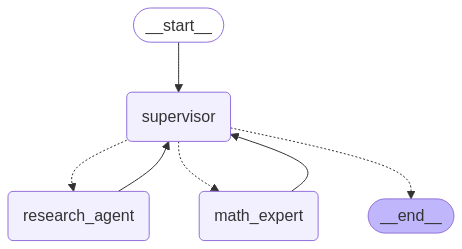

In [48]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))